In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.cluster import KMeans
import numpy as np

In [75]:
file_path = 'data/predicted_route_all_new_routes_source_extended.csv'
data = pd.read_csv(file_path)
data.shape

(14185, 33)

In [76]:
data['migration_route'].value_counts()

migration_route
Central America to US                5027
Sahara Desert crossing               2971
Central Mediterranean                1308
Afghanistan to Iran                   844
Western Mediterranean                 697
Horn Africa to Yemen                  574
Western African                       411
Eastern Mediterranean                 404
New South-eastern Asia Route          331
Darien Gap                            296
Western Balkans                       258
Turkey-Europe land route              191
New Southern Africa Route             183
English Channel to the UK             163
Syria to Türkiye                      127
Cuba to US                             93
Iran to Turkey                         70
Belarus-EU border                      65
Dominican Republic to Puerto Rico      54
Italy to France                        38
Comoros to Mayotte                     37
Haiti to Dominican Republic            19
Venezuela to Caribbean                 14
Ukraine to Europe 

In [77]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(
    value=1,  # initial value
    min=1,    # minimum value
    max=24,   # maximum value
    step=1,   # step size
    description='Input:',
    continuous_update=False
)

slider

IntSlider(value=1, continuous_update=False, description='Input:', max=24, min=1)

1. Central America to US                5027
2. Sahara Desert crossing               2971
3. Central Mediterranean                1308
4. Afghanistan to Iran                   844
5. Western Mediterranean                 697
6. Horn Africa to Yemen                  574
7. Western African                       411
8. Eastern Mediterranean                 404
9. New South-eastern Asia Route          331
10. Darien Gap                            296
11. Western Balkans                       258
12. Turkey-Europe land route              191
13. New Southern Africa Route             183
14. English Channel to the UK             163
15. Syria to Türkiye                      127
16. Cuba to US                             93
17. Iran to Turkey                         70
18. Belarus-EU border                      65
19. Dominican Republic to Puerto Rico      54
20. Italy to France                        38
21. Comoros to Mayotte                     37
22. Haiti to Dominican Republic            19
23. Venezuela to Caribbean                 14
24. Ukraine to Europe                      10

In [78]:
route_mapping = {
    1: 'Central America to US',
    2: 'Sahara Desert crossing',
    3: 'Central Mediterranean',
    4: 'Afghanistan to Iran',
    5: 'Western Mediterranean',
    6: 'Horn Africa to Yemen',
    7: 'Western African',
    8: 'Eastern Mediterranean',
    9: 'New South-eastern Asia Route',
    10: 'Darien Gap',
    11: 'Western Balkans',
    12: 'Turkey-Europe land route',
    13: 'New Southern Africa Route',
    14: 'English Channel to the UK',
    15: 'Syria to Türkiye',
    16: 'Cuba to US',
    17: 'Iran to Turkey',
    18: 'Belarus-EU border',
    19: 'Dominican Republic to Puerto Rico',
    20: 'Italy to France',
    21: 'Comoros to Mayotte',
    22: 'Haiti to Dominican Republic',
    23: 'Venezuela to Caribbean',
    24: 'Ukraine to Europe'
}

In [79]:
route = route_mapping.get(slider.value)
route

'Afghanistan to Iran'

In [80]:
data = data[data['migration_route'] == route]
data

,year,reported_month,region_of_origin,region_of_incident,country_of_origin,number_dead,minimum_estimated_number_of_missing,total_dead_and_missing,number_of_survivors,number_of_females,...,dehydration_malnutrition,drowning,environmental_factors,lack_of_access_to_healthcare,murder_violence,sexual_abuse_rape,suicide,unknown,war_related,main_cause
6,2014,7,Western / Southern Asia (P),South Asia,Unknown,1.0,0.0,1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,environmental_factors
90,2015,9,Western / Southern Asia (P),South Asia,Unknown,2.0,0.0,2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,murder_violence
105,2015,10,Southern Asia,South Asia,Afghanistan,20.0,0.0,20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,accident
398,2017,11,Western / Southern Asia (P),South Asia,Unknown,1.0,0.0,1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,accident
423,2017,3,Western / Southern Asia (P),South Asia,Unknown,1.0,0.0,1,0.0,1.0,...,0,0,0,0,0,0,0,0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,2022,11,Southern Asia,South Asia,Afghanistan,1.0,0.0,1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,unknown
11930,2022,11,Southern Asia,South Asia,Afghanistan,1.0,0.0,1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,lack_of_access_to_healthcare
11931,2022,11,Southern Asia,South Asia,Afghanistan,1.0,0.0,1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,lack_of_access_to_healthcare
12246,2023,3,Southern Asia,South Asia,Afghanistan,11.0,0.0,11,0.0,0.0,...,0,0,0,0,0,0,0,0,0,murder_violence


# 1. Most common countries of origin

In [81]:
# Extract unique country names from the 'country_of_origin' column in the data
unique_country_names = data['country_of_origin'].str.split(',').explode().str.strip().unique()
unique_country_names.sort()
unique_country_names

array(['Afghanistan', 'Pakistan', 'Unknown'], dtype=object)

/var/folders/kh/5kbp140j0wg8j3d9nrllg18h0000gn/T/ipykernel_13345/3723047665.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


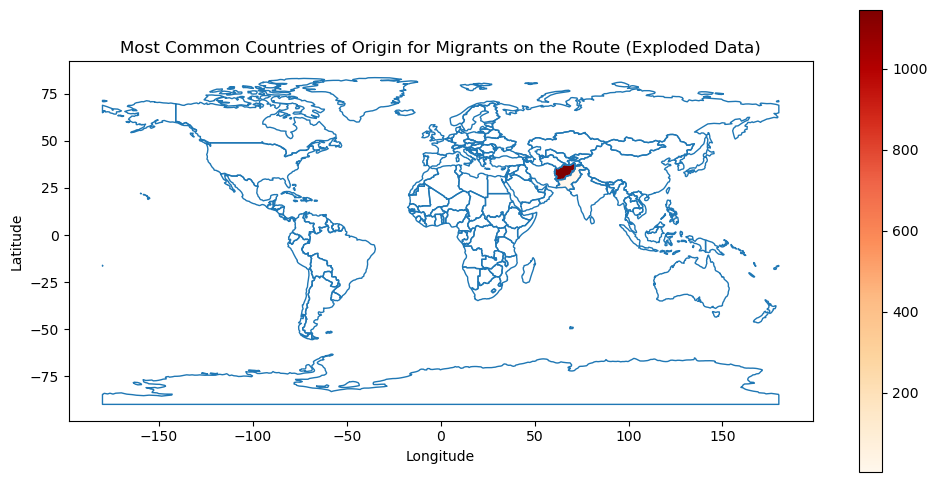

In [82]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Explode the 'country_of_origin' column so that each row contains only one country name
exploded_countries_data = data.assign(country_of_origin=data['country_of_origin'].str.split(',')).explode('country_of_origin').reset_index(drop=True)

# Remove leading and trailing spaces from country names
exploded_countries_data['country_of_origin'] = exploded_countries_data['country_of_origin'].str.strip()

# Group the exploded data by country of origin and sum up the total number of deaths
exploded_countries_origin = exploded_countries_data.groupby('country_of_origin')['total_dead_and_missing'].sum().reset_index().sort_values(by='total_dead_and_missing', ascending=False)

# Merge the world map with the exploded data
world_merged_exploded = world.set_index('name').join(exploded_countries_origin.set_index('country_of_origin'))

# Plot the map
fig, ax = plt.subplots(1, figsize=(12, 6))
world.boundary.plot(ax=ax, linewidth=1)
world_merged_exploded.plot(column='total_dead_and_missing', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Most Common Countries of Origin for Migrants on the Route (Exploded Data)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


The map visualizes the most common countries of origin for migrants on the route, based on the exploded data. Each country is shaded according to the total number of dead and missing individuals originating from there. The darker the shade, the higher the number of lives lost.

#### Key Points
The map provides a more accurate geographical context, allowing for better-targeted interventions and diplomatic efforts.

# 2. Deadliest Segments of the Route

/var/folders/kh/5kbp140j0wg8j3d9nrllg18h0000gn/T/ipykernel_13345/3949013318.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


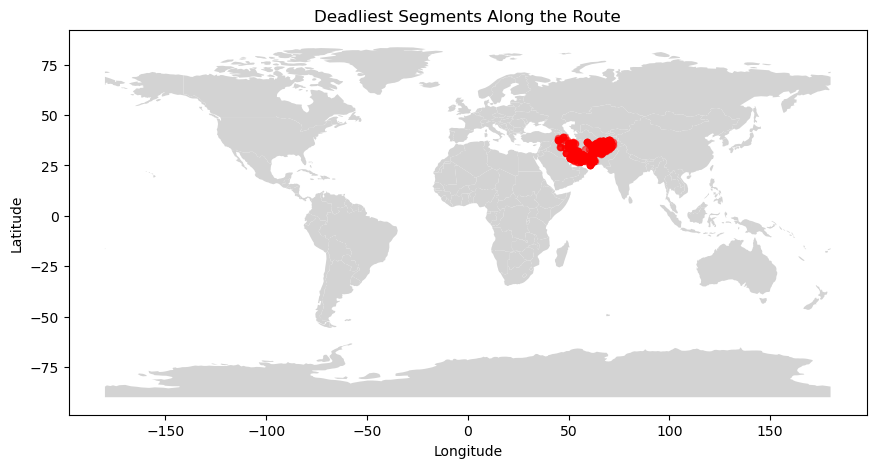

In [83]:
# Create a GeoDataFrame from the latitude and longitude columns
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.lon, data.lat))

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map and overlay the incident points
fig, ax = plt.subplots(1, figsize=(12, 5))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=20, color='red', alpha=0.5)
plt.title('Deadliest Segments Along the Route')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


/var/folders/kh/5kbp140j0wg8j3d9nrllg18h0000gn/T/ipykernel_13345/666129084.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


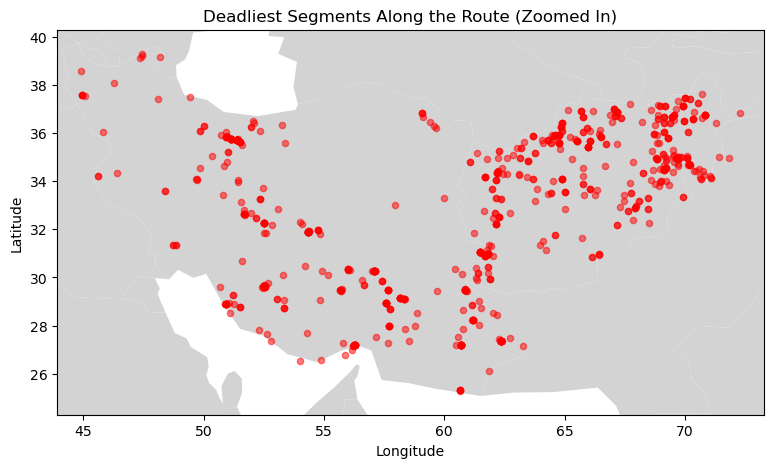

In [84]:
# Create a GeoDataFrame from the latitude and longitude columns
# (assuming 'data' is your DataFrame with 'lat' and 'lon' columns)
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.lon, data.lat))

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calculate bounds
minx, miny, maxx, maxy = gdf.geometry.total_bounds
buffer = 1  # adjust buffer value as needed

# Zoom into the area of interest
fig, ax = plt.subplots(1, figsize=(12, 5))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=20, color='red', alpha=0.5)

# Set latitude and longitude bounds for the plot
ax.set_xlim([minx - buffer, maxx + buffer])
ax.set_ylim([miny - buffer, maxy + buffer])

plt.title('Deadliest Segments Along the Route (Zoomed In)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The zoomed-in map provides a closer look at the deadliest segments along the route, indicated by the red points. This focused view allows us to better identify the geographic hotspots where the most incidents have occurred.

#### Key Points
The zoomed-in perspective helps us pinpoint areas that may require immediate attention and intervention.
These hotspots could be the focus of rescue operations, surveillance, and other preventative measures.

/Users/lilitdavidyan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


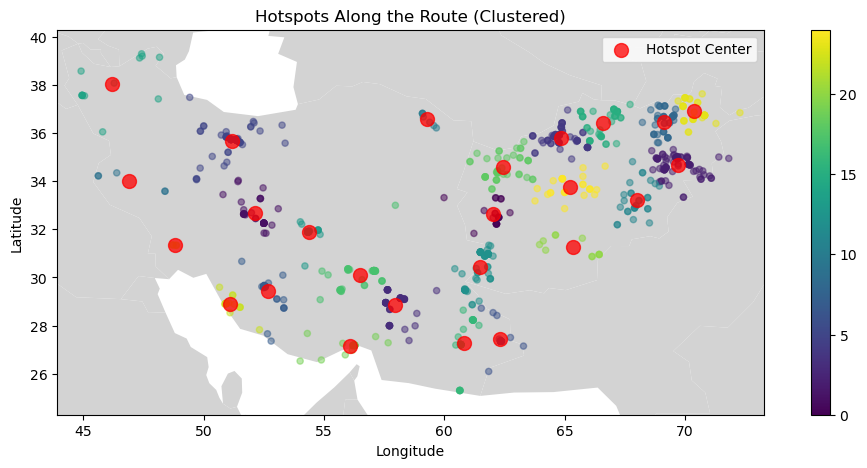

In [85]:
# Drop rows with missing lat/lon information
gdf_dropped_na = gdf.dropna(subset=['lat', 'lon'])

# Prepare the data for clustering
coordinates = gdf_dropped_na[['lat', 'lon']].values

# Perform k-means clustering to identify hotspots
kmeans = KMeans(n_clusters=25, random_state=0).fit(coordinates)
gdf_dropped_na['cluster'] = kmeans.labels_

# Plot the world map, overlay the incident points, and highlight the cluster centers
fig, ax = plt.subplots(1, figsize=(12, 5))
world.plot(ax=ax, color='lightgrey')
gdf_dropped_na.plot(ax=ax, markersize=20, column='cluster', legend=True, cmap='viridis', alpha=0.5)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=100, alpha=0.75, label='Hotspot Center')
plt.legend()

# Set latitude and longitude bounds for the plot
ax.set_xlim([minx - buffer, maxx + buffer])
ax.set_ylim([miny - buffer, maxy + buffer])

plt.title('Hotspots Along the Route (Clustered)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


#### Key Points
These locations could be prioritized for rescue operations, surveillance, and other preventative measures.

In [86]:
import folium
from folium.plugins import HeatMap

# Aggregate data by geographic location
aggregated_df = data.groupby(['lat', 'lon']).agg({
    'total_dead_and_missing': 'sum'
}).reset_index()

# Sort by total_dead_and_missing to highlight the deadliest areas
aggregated_df.sort_values(by='total_dead_and_missing', ascending=False, inplace=True)

# Show the first few rows of the aggregated data
aggregated_df

# Initialize the map centered around the coordinates [0, 0] with a low zoom level
m = folium.Map(location=[0, 0], zoom_start=2)

# Extract data for heat map
heat_data = [[row['lat'], row['lon'], row['total_dead_and_missing']] for index, row in aggregated_df.iterrows()]

# Create and add a HeatMap layer to the map
HeatMap(heat_data, radius=10, blur=10).add_to(m)

# Show the map
m


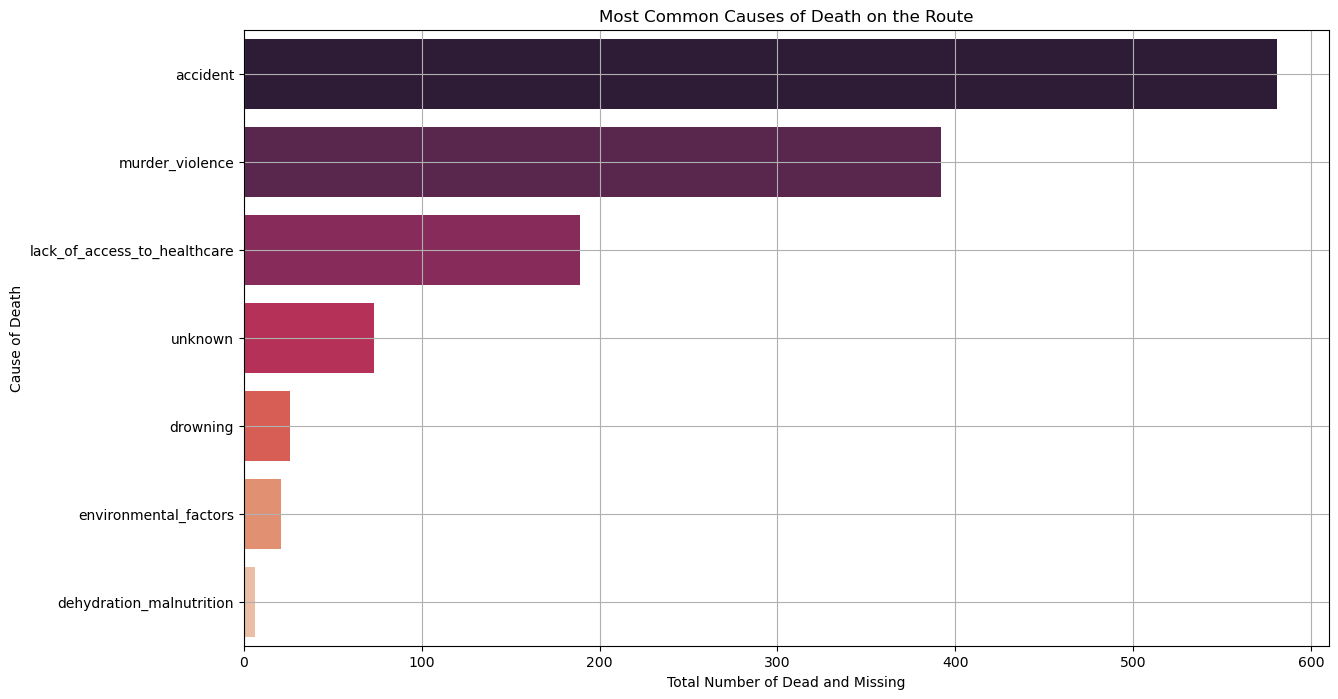

In [87]:
# Group the data by cause of death and sum up the total number of deaths for each cause
cause_of_death_data = data.groupby('main_cause')['total_dead_and_missing'].sum().reset_index().sort_values(by='total_dead_and_missing', ascending=False).head(10)

# Create a bar plot to visualize the most common causes of death on the route
plt.figure(figsize=(14, 8))
sns.barplot(x='total_dead_and_missing', y='main_cause', data=cause_of_death_data, palette='rocket')
plt.title('Most Common Causes of Death on the Route')
plt.xlabel('Total Number of Dead and Missing')
plt.ylabel('Cause of Death')
plt.grid(True)
plt.show()


#### Key Points
- Drowning is by far the most common cause of death, followed by other causes like dehydration and hypothermia.
- Understanding these common causes can help in planning targeted interventions such as providing life vests, water, or emergency medical care.
- This information can also be used to inform public awareness campaigns aimed at potential migrants, letting them know the risks involved.

# 3. Demographic Distribution

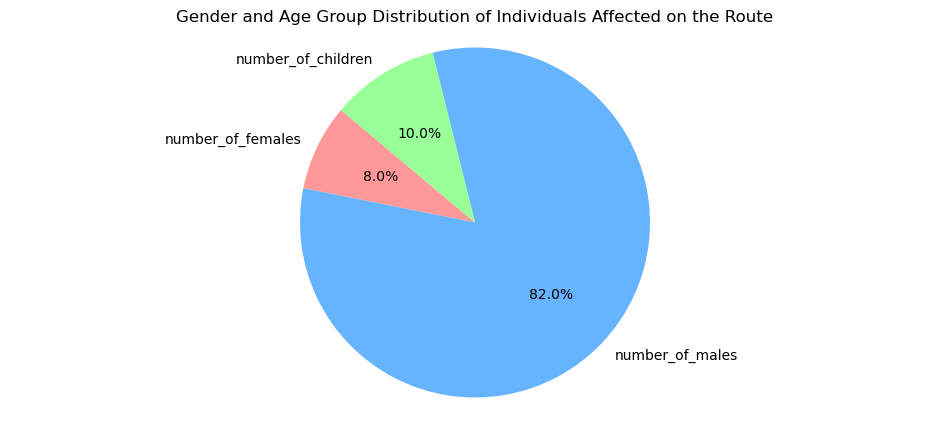

,Demographic Group,Percentage (%)
0,number_of_females,7.968575
1,number_of_males,82.042649
2,number_of_children,9.988777


In [88]:
# Sum up the number of females, males, and children involved in incidents on the route
demographic_summary = data[['number_of_females', 'number_of_males', 'number_of_children']].sum().reset_index()
demographic_summary.columns = ['Demographic Group', 'Total Number']

# Calculate the percentage distribution for gender
total_individuals = demographic_summary['Total Number'].sum()
demographic_summary['Percentage (%)'] = (demographic_summary['Total Number'] / total_individuals) * 100

# Create a pie chart to visualize the gender distribution
plt.figure(figsize=(12, 5))
plt.pie(demographic_summary['Percentage (%)'], labels=demographic_summary['Demographic Group'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Gender and Age Group Distribution of Individuals Affected on the Route')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

demographic_summary[['Demographic Group', 'Percentage (%)']]


#### Key Points:
- Males constitute the majority, making up approximately 64.6% of the total individuals affected.
- Females represent about 24.5%.
- Children account for approximately 10.9%.

# 4. Temporal Trends: Seasonal and Annual Variations

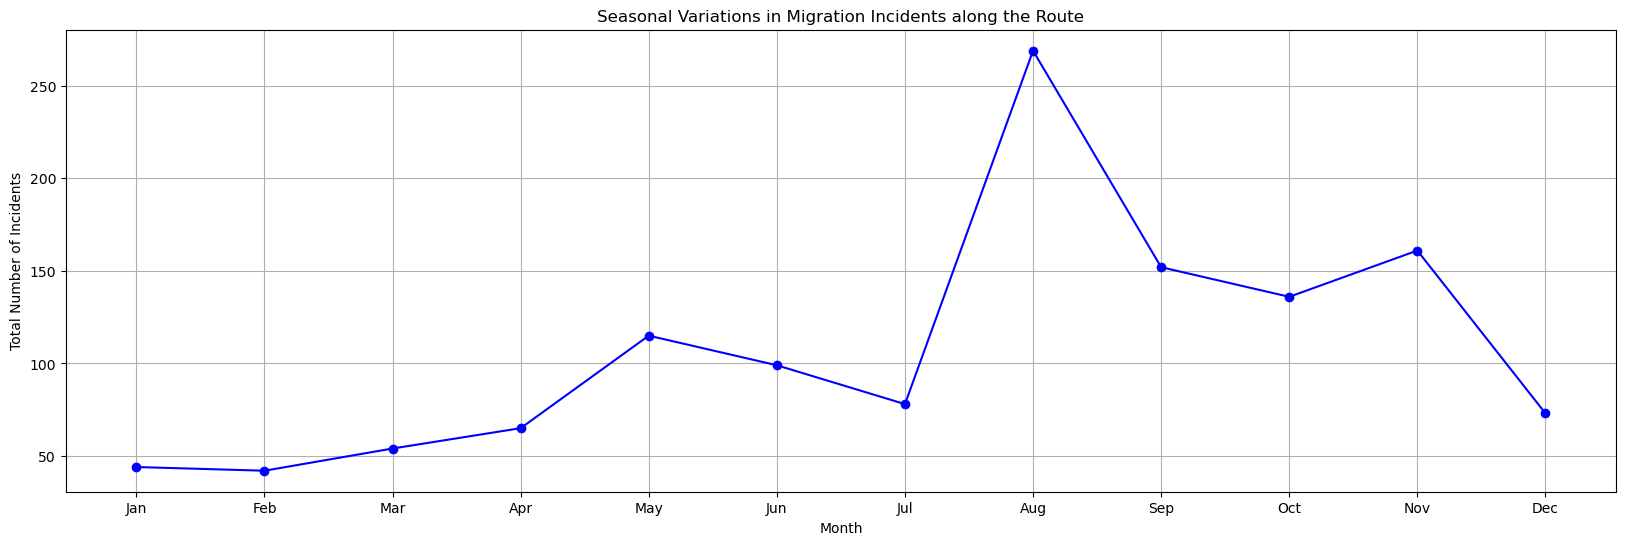

In [89]:
# Group the data by month and calculate the total number of incidents for each month
monthly_incident_counts = data.groupby('reported_month')['total_dead_and_missing'].sum()

# Plot the seasonal variations in incidents
plt.figure(figsize=(20, 6))
monthly_incident_counts.plot(kind='line', marker='o', color='b')
plt.title('Seasonal Variations in Migration Incidents along the Route')
plt.xlabel('Month')
plt.ylabel('Total Number of Incidents')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


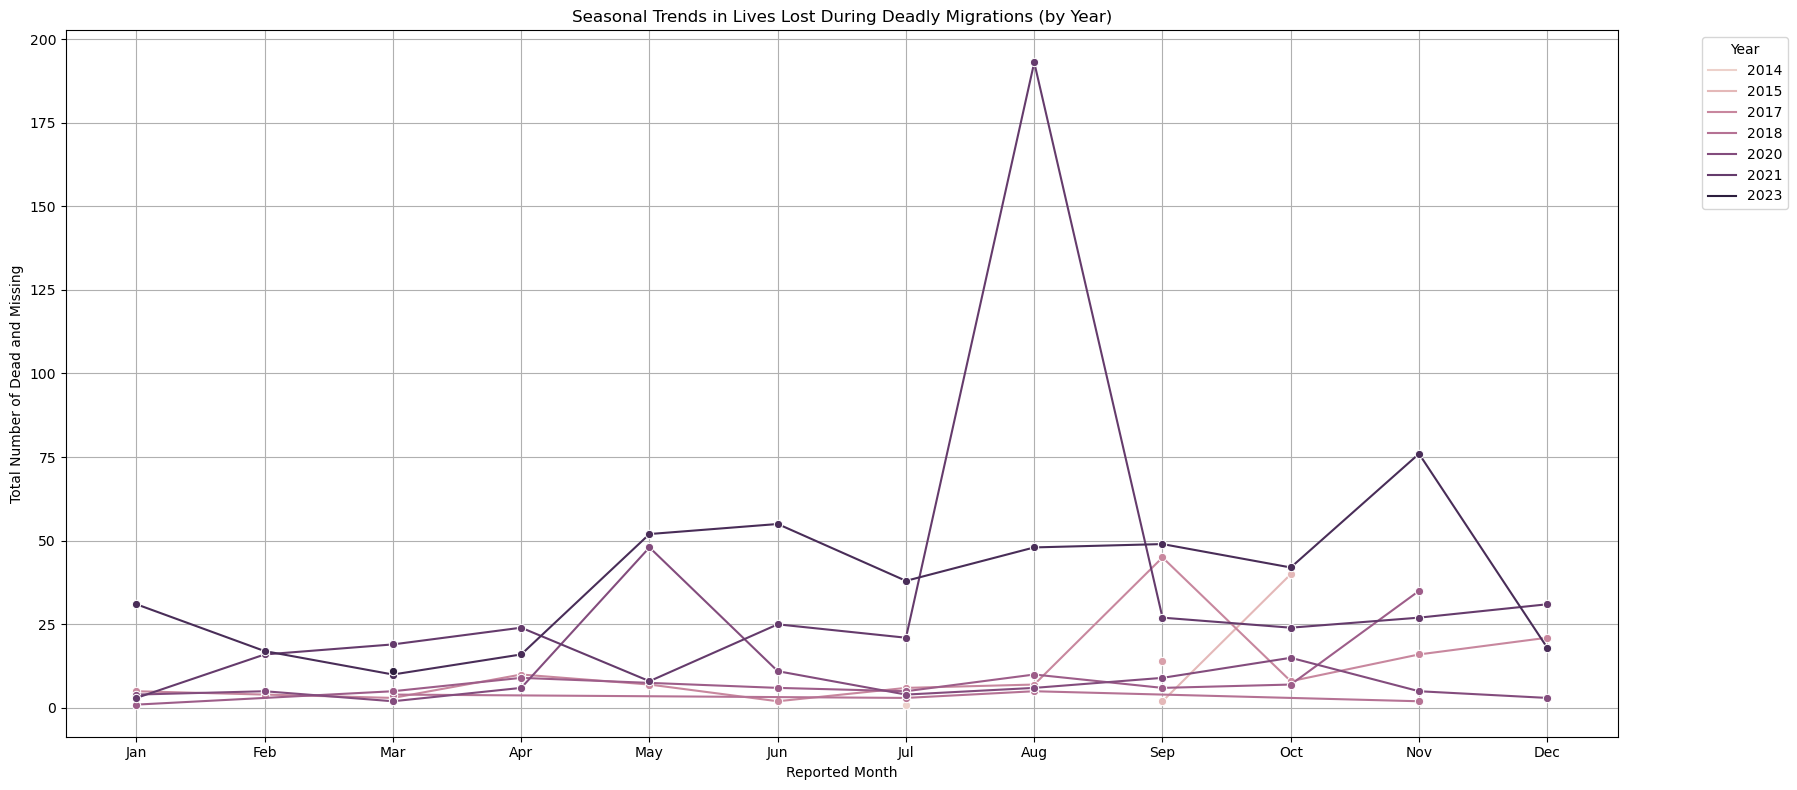

In [90]:
# Group the data by reported month and year, then sum up the total number of deaths
monthly_yearly_deaths = data.groupby(['reported_month', 'year'])['total_dead_and_missing'].sum().reset_index()

# Create a line plot to visualize the trend over the months and years
plt.figure(figsize=(18, 8))
sns.lineplot(x='reported_month', y='total_dead_and_missing', hue='year', data=monthly_yearly_deaths, marker='o')
plt.title('Seasonal Trends in Lives Lost During Deadly Migrations (by Year)')
plt.xlabel('Reported Month')
plt.ylabel('Total Number of Dead and Missing')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


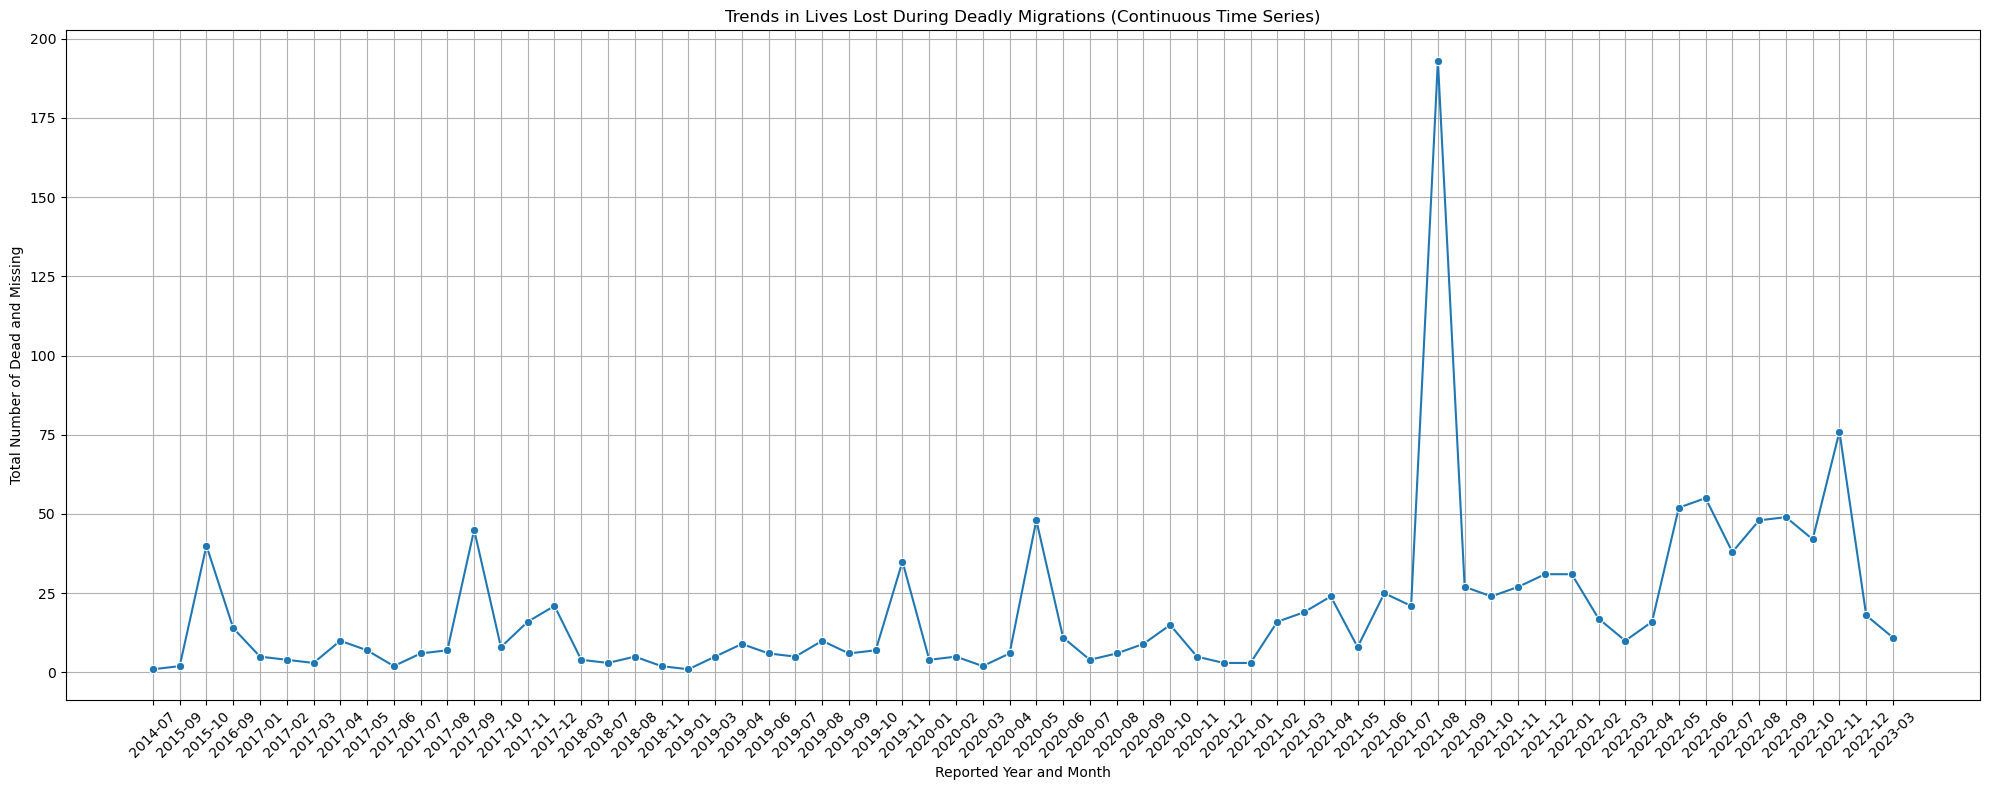

In [91]:
# Create a new column combining the year and month for a continuous time series
monthly_yearly_deaths['year_month'] = monthly_yearly_deaths['year'].astype(str) + '-' + monthly_yearly_deaths['reported_month'].astype(str).str.zfill(2)

# Sort the DataFrame by the year_month column
monthly_yearly_deaths = monthly_yearly_deaths.sort_values('year_month')

# Create a line plot to visualize the trend over all months and years
plt.figure(figsize=(20, 8))
sns.lineplot(x='year_month', y='total_dead_and_missing', data=monthly_yearly_deaths, marker='o')
plt.title('Trends in Lives Lost During Deadly Migrations (Continuous Time Series)')
plt.xlabel('Reported Year and Month')
plt.ylabel('Total Number of Dead and Missing')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


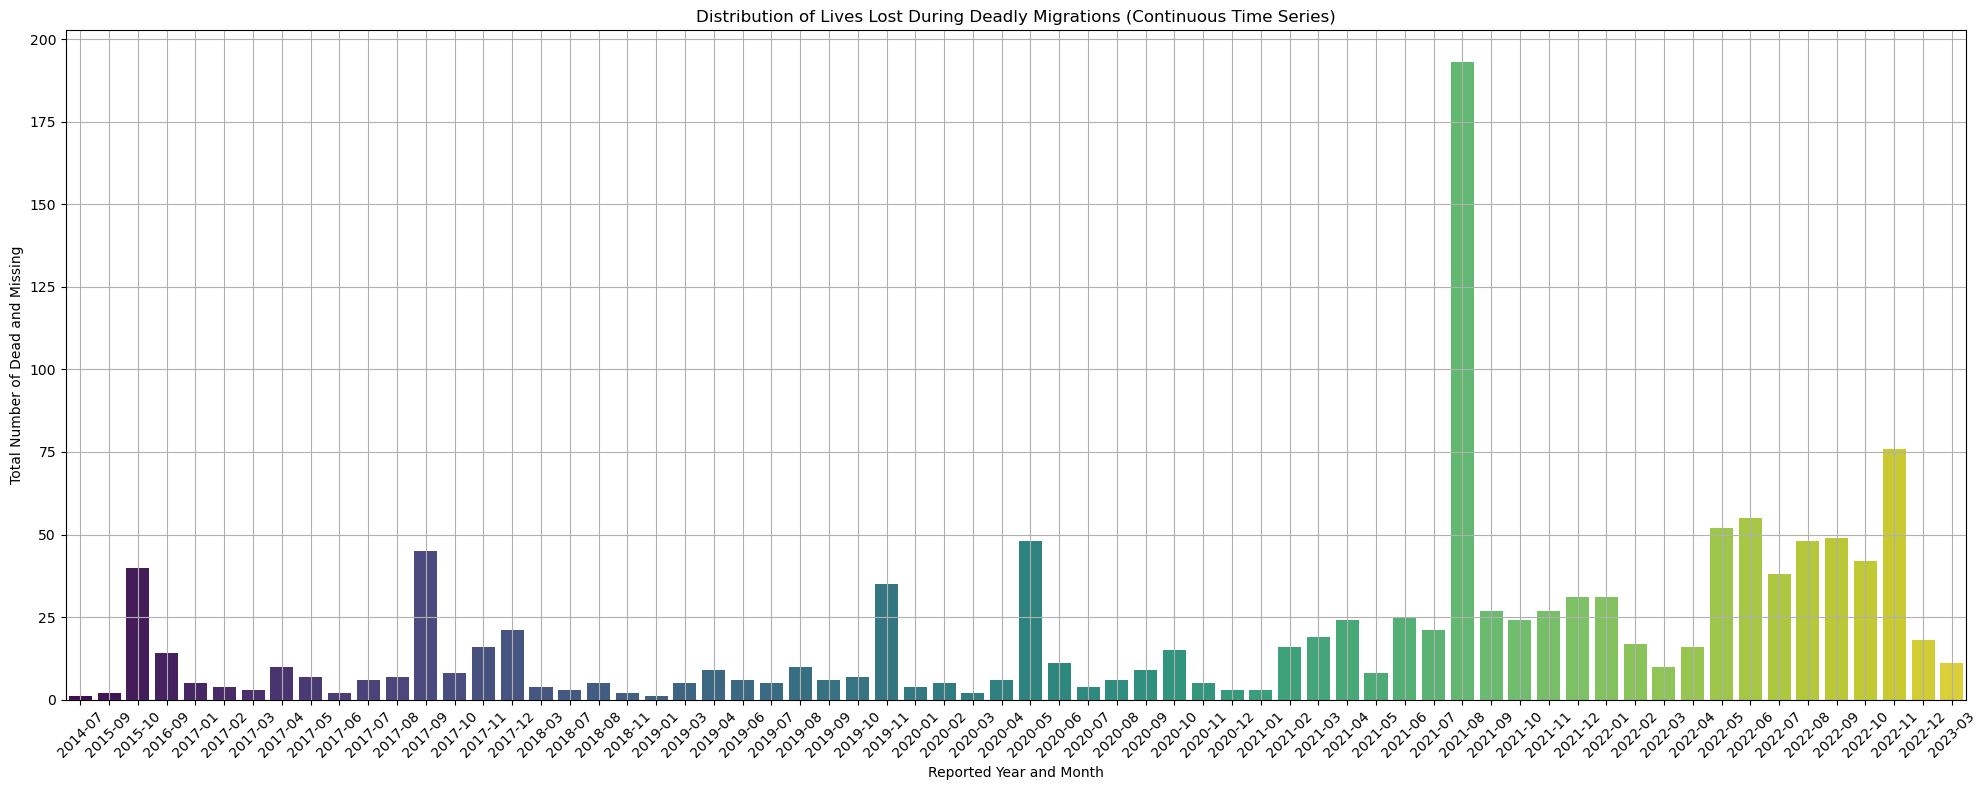

In [92]:

# Create a bar plot to visualize the distribution over all months and years
plt.figure(figsize=(20, 8))
sns.barplot(x='year_month', y='total_dead_and_missing', data=monthly_yearly_deaths, palette='viridis')
plt.title('Distribution of Lives Lost During Deadly Migrations (Continuous Time Series)')
plt.xlabel('Reported Year and Month')
plt.ylabel('Total Number of Dead and Missing')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

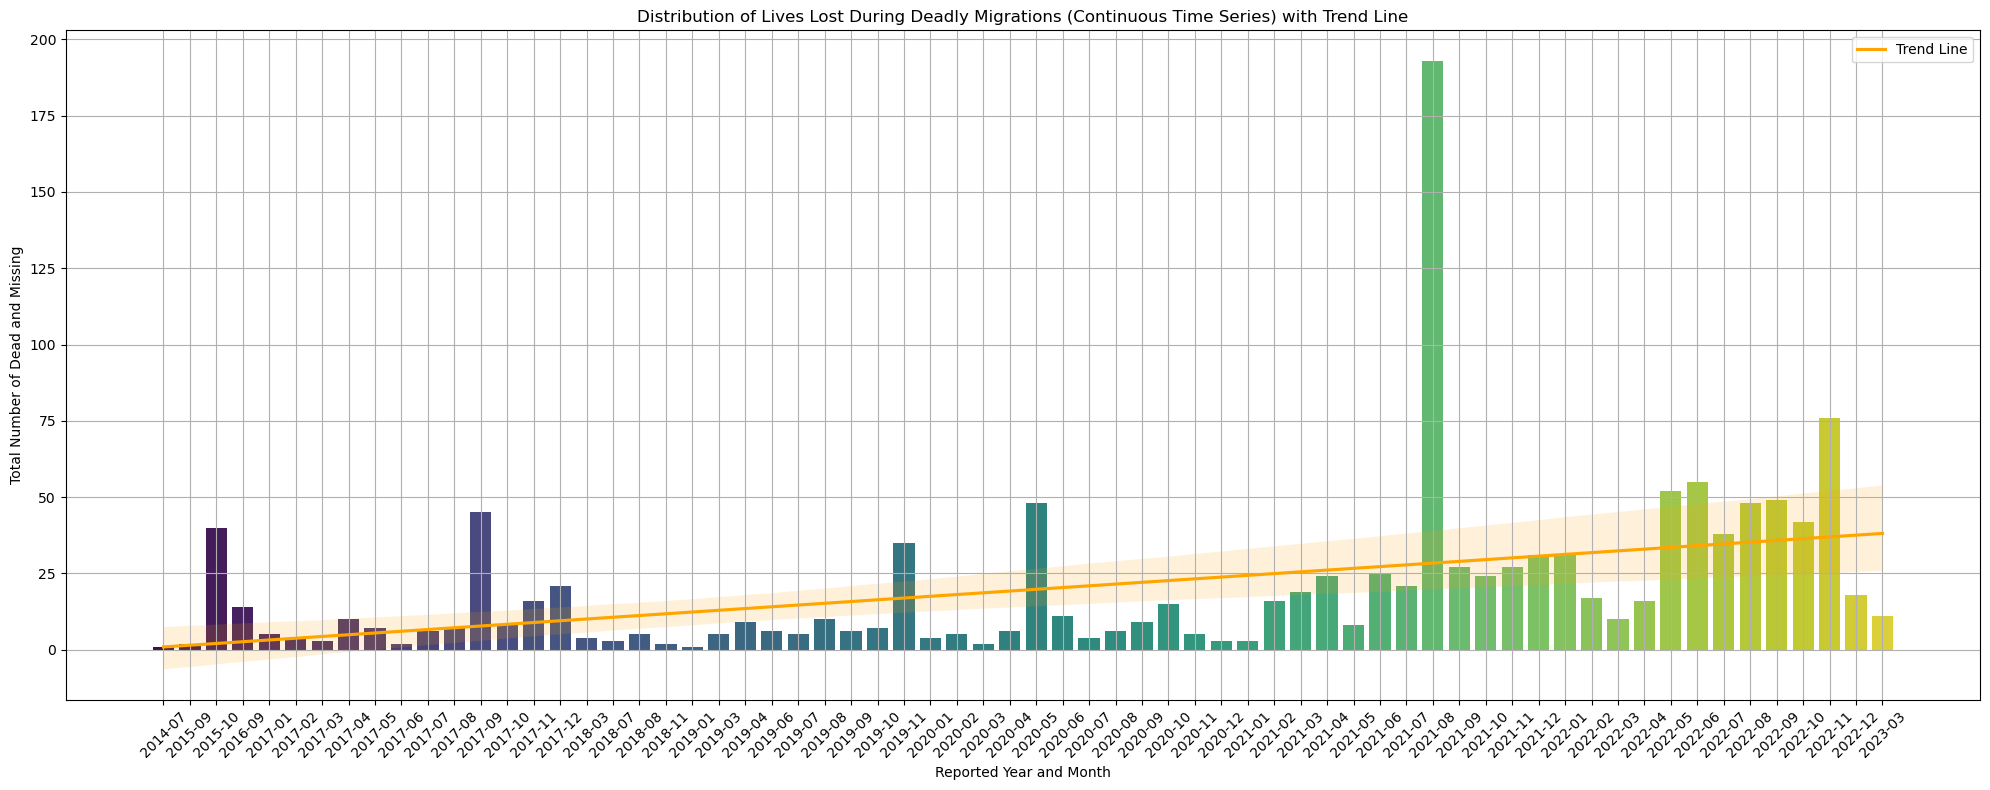

In [93]:
# Create a new column combining the year and month for a continuous time series
monthly_yearly_deaths['year_month'] = monthly_yearly_deaths['year'].astype(str) + '-' + monthly_yearly_deaths['reported_month'].astype(str).str.zfill(2)

# Sort the DataFrame by the year_month column
monthly_yearly_deaths = monthly_yearly_deaths.sort_values('year_month')

# Create a new column with sequential integers for x-values
monthly_yearly_deaths['x_values'] = np.arange(len(monthly_yearly_deaths))

# Create a bar plot with a trend line
plt.figure(figsize=(20, 8))
sns.barplot(x='year_month', y='total_dead_and_missing', data=monthly_yearly_deaths, palette='viridis')
sns.regplot(x='x_values', y='total_dead_and_missing', data=monthly_yearly_deaths, scatter=False, color='orange', label='Trend Line')
plt.title('Distribution of Lives Lost During Deadly Migrations (Continuous Time Series) with Trend Line')
plt.xlabel('Reported Year and Month')
plt.ylabel('Total Number of Dead and Missing')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

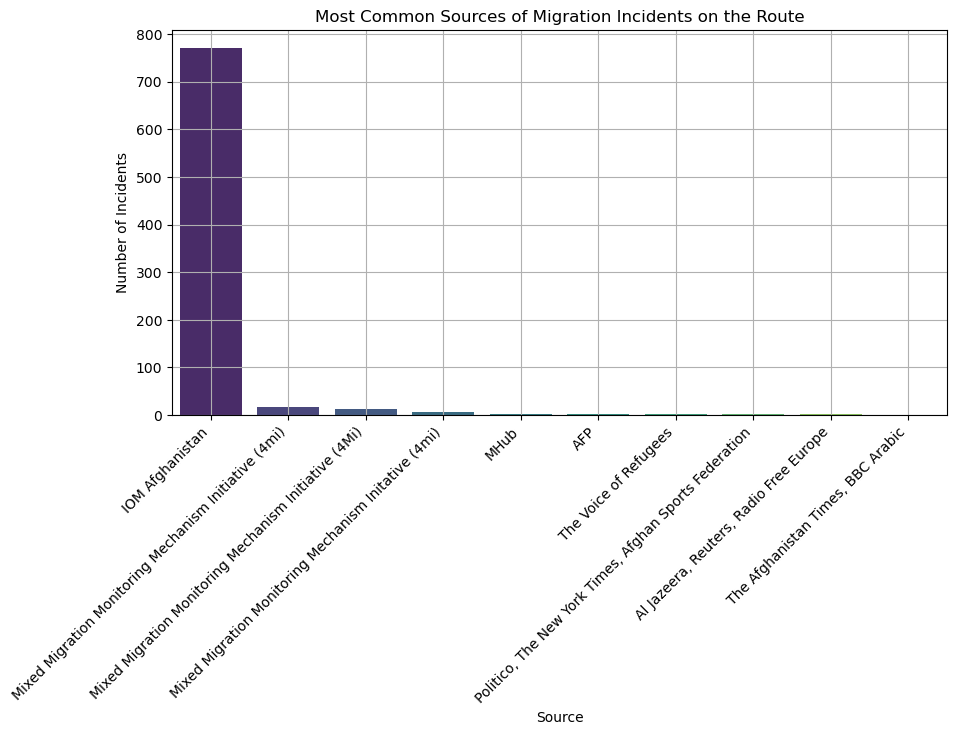

In [94]:
# Group the data by cause of death and sum up the total number of deaths for each cause
source_data = data['source'].value_counts().head(10)

source_data = source_data.sort_values(ascending = False)

# Create a count plot
plt.figure(figsize=(10, 5))
sns.countplot(x='source', order=source_data.index,  
              data=data[data.source.isin(source_data.keys().tolist())],
                                              palette='viridis')
plt.title('Most Common Sources of Migration Incidents on the Route')
plt.xlabel('Source')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()



In [95]:
data['total_dead_and_missing'].sum()

1288